# Malaria: Parasite detection using ensemble learning in Keras and tensorflow

import/intall the required libraries: tensorflow, keras, sklearn, cv2, matplotlib, statistics 

!pip3 install keras tensorflow sklearn matplotlib opencv-python pandas

Dataset: https://www.tensorflow.org/datasets/catalog/malaria

In [1]:
import os
import glob
import threading
import statistics
import numpy as np
import pandas as pd
from concurrent import futures

In [2]:
# note: sklearn has been depreceated. plan accordantly but it is still running as written below
# More information is available at https://github.com/scikit-learn/sklearn-pypi-package

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the dataset
File names are obtained using the glob module

In [4]:
#select a random number of images
#check each class to be at least 50/50

infected = '/kaggle/input/malaria-cell-images/cell_images/Parasitized'
healthy = '/kaggle/input/malaria-cell-images/cell_images/Uninfected'

infected_files = glob.glob(infected+'/*.png')
healthy_files = glob.glob(healthy+'/*.png')

files_df = pd.DataFrame({
    'img': infected_files + healthy_files,
    'malaria': [1] * len(infected_files) + [0] * len(healthy_files)
})

files_df = files_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Just to reduce complexity
files_df = files_df.iloc[0:2000, :]
files_df['malaria'].value_counts()

malaria
1    1030
0     970
Name: count, dtype: int64

# Create the datasets by transforming the images into arrays

/kaggle/input/malaria-cell-images/cell_images/Parasitized/C98P59ThinF_IMG_20150917_154452_cell_203.png
/kaggle/input/malaria-cell-images/cell_images/Parasitized/C189P150ThinF_IMG_20151203_141004_cell_72.png
/kaggle/input/malaria-cell-images/cell_images/Uninfected/C210ThinF_IMG_20151029_162834_cell_153.png
/kaggle/input/malaria-cell-images/cell_images/Uninfected/C215ThinF_IMG_20151106_133116_cell_196.png
/kaggle/input/malaria-cell-images/cell_images/Uninfected/C237ThinF_IMG_20151127_105320_cell_148.png
/kaggle/input/malaria-cell-images/cell_images/Uninfected/C232ThinF_IMG_20151112_154719_cell_115.png
/kaggle/input/malaria-cell-images/cell_images/Parasitized/C132P93ThinF_IMG_20151004_151811_cell_155.png
/kaggle/input/malaria-cell-images/cell_images/Parasitized/C182P143NThinF_IMG_20151201_172759_cell_45.png
/kaggle/input/malaria-cell-images/cell_images/Parasitized/C133P94ThinF_IMG_20151004_155518_cell_99.png
/kaggle/input/malaria-cell-images/cell_images/Parasitized/C59P20thinF_IMG_2015080

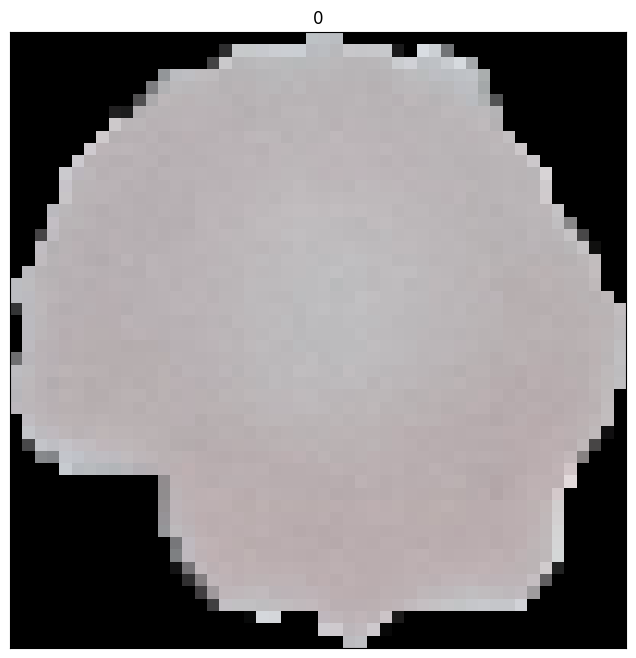

In [5]:
#binary images | convert them into numbers
#pass them into the machine learning pipeline
#using cv2 library to read and resize the images
#get_data() function
#split the dataset into 80:20 train test split
#matplotlib.imshow() function to plot image from 3-d arrays

img_length, img_width = 50, 50


def get_data(data_files):
    data = []
    for img in data_files:
        print(img)
        img = cv2.imread(img)
        img = cv2.resize(img, dsize=(img_length, img_width),
                         interpolation=cv2.INTER_CUBIC)
        img = np.array(img)
        data += [img]
    return np.array(data)

X = files_df['img'].values
y = files_df['malaria'].values

X_converted = get_data(X)/255.0

train_data, val_data, train_labels, val_labels = train_test_split(
    X_converted, y, test_size=0.2, random_state=42)

# Check images

plt.figure(figsize=(8, 8))
plt.imshow(train_data[0])
plt.title('{}'.format(train_labels[0]))
plt.xticks([])
plt.yticks([])
plt.savefig('sample')

# Convolutional neural network (CNN)

#predicting presence or absence of maleria in cell images
#adam optimizer used with learning_rate = 0.001

import tensorflow as tf
from keras.optimizers import SGD, Adam
from keras.layers import Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu',
                 input_shape=(img_length, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

adam = Adam(learning_rate=0.001)

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.layers import Input, Conv2D, Activation, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

# Define input shape
input_shape = (img_length, img_width, 3)

# Create a sequential model
model = Sequential()

# Add the input layer with Input(shape)
model.add(Input(shape=input_shape))

# Add convolutional layers
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Print model summary
model.summary()

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])


2024-02-29 03:18:22.830126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 03:18:22.830196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 03:18:22.831062: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,857 (93.19 KB)

 Trainable params: 23,857 (93.19 KB)

 Non-trainable params: 0 (0.00 B)

# Train and Test the CNN

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5013 - loss: 0.6940 - val_accuracy: 0.5200 - val_loss: 0.6909
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5240 - loss: 0.6911 - val_accuracy: 0.5200 - val_loss: 0.6894
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5366 - loss: 0.6866 - val_accuracy: 0.5700 - val_loss: 0.6786
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5922 - loss: 0.6716 - val_accuracy: 0.6625 - val_loss: 0.6381
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6566 - loss: 0.6383 - val_accuracy: 0.7300 - val_loss: 0.6007
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6852 - loss: 0.6118 - val_accuracy: 0.6150 - val_loss: 0.6531
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.7026 - loss: 0.6136 - val_accuracy: 0.7350 - val_loss: 0.5400
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7481 - loss: 0.5365 - val_accuracy: 0.7550 - v

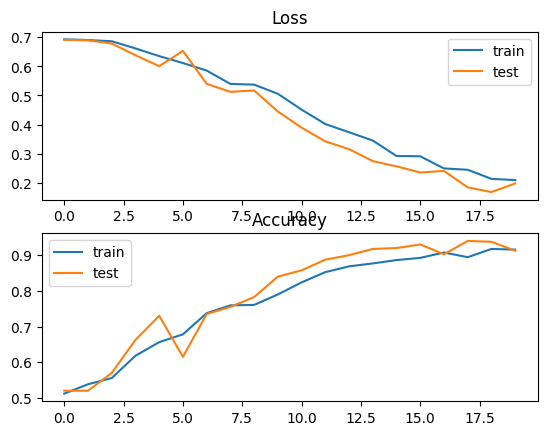

In [7]:
#call the model.fit in 25 epochs
#perform predictions
#measure prediction accuracy using classification
#Epoch 1/20
#25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8807 - loss: 0.2994 - val_accuracy: 0.8775 - val_loss: 0.2843
#Epoch 2/20


history = model.fit(x=train_data, y=train_labels, batch_size=64, epochs=20,
                    verbose=1, shuffle=True, validation_data=(val_data, val_labels))

# Predict probabilities for each class
y_probabilities = model.predict(val_data)

# Convert probabilities to binary predictions
y_predicted = (y_probabilities > 0.5).astype(int)

# y_predicted = model.predict_classes(val_data)

# accuracy = (true positives + true negatives) / (positives + negatives)
print('Accuracy: ', accuracy_score(val_labels, y_predicted))
# precision = true positives / (true positives + false positives)
print('Precision: ', precision_score(val_labels, y_predicted))
# recall = true positives / (true positives + false negatives)
print('Recall: ', recall_score(val_labels, y_predicted))
# f1 = 2 * (precision * recall) / (precision + recall)
print('f1: ', f1_score(val_labels, y_predicted))

print(classification_report(val_labels, y_predicted))

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
#predict how close we are from the actual values
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.savefig('accuracy_loss')


# Create the CNN models ensemble

In [8]:
#Input(shape) object as the first layer in the model 
from keras.layers import Input

input_shape = (img_length, img_width, 3)  # Define input shape outside the loop

models = {}  # Create a dictionary to store models

for j in range(2, 4):
    newmodel = Sequential()
    newmodel.add(Input(shape=input_shape))  # Use Input layer as the first layer
    newmodel.add(Conv2D(j*16, (3, 3), activation='relu'))
    newmodel.add(MaxPooling2D(pool_size=(2, 2)))
    newmodel.add(Conv2D(j*16, (3, 3), activation='relu'))
    newmodel.add(MaxPooling2D(pool_size=(2, 2)))
    newmodel.add(Conv2D(j*32, (3, 3), activation='relu'))
    newmodel.add(MaxPooling2D(pool_size=(2, 2)))
    newmodel.add(Flatten())
    newmodel.add(Dense(j*32, activation='relu'))
    newmodel.add(Dropout(0.5))
    newmodel.add(Dense(1, activation='sigmoid'))

    newmodel.compile(optimizer=adam,
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
    newmodel.summary()
    models[j] = newmodel


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,021 (554.77 KB)

 Trainable params: 94,305 (368.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,716 (186.39 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 48)     │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 96)       │        41,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 96)             │       147,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,061 (1011.96 KB)

 Trainable params: 211,345 (825.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,716 (186.39 KB)

# Fit the models in the ensemble and perform the prediction

In [9]:
for j in models:
    adam = Adam(learning_rate=0.001)  # Recreate optimizer for each model
    models[j].compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    models[j].fit(x=train_data, y=train_labels, batch_size=64, epochs=25,
                  verbose=1, shuffle=True, validation_data=(val_data, val_labels))


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.5024 - loss: 0.6978 - val_accuracy: 0.5700 - val_loss: 0.6913
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5763 - loss: 0.6876 - val_accuracy: 0.5575 - val_loss: 0.6770
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5870 - loss: 0.6753 - val_accuracy: 0.5225 - val_loss: 0.6764
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.5657 - loss: 0.6698 - val_accuracy: 0.6550 - val_loss: 0.6307
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6897 - loss: 0.6125 - val_accuracy: 0.6575 - val_loss: 0.6021
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.6720 - loss: 0.6142 - val_accuracy: 0.7175 - val_loss: 0.5304
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.7543 - loss: 0.5312 - val_accuracy: 0.8350 - val_loss: 0.4568
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8205 - loss: 0.4560 - val_accuracy: 0.8700 - v

#fit each of the model using the same datasets
for j in models:
    models[j].fit(x=train_data, y=train_labels, batch_size=64, epochs=25,
                  verbose=1, shuffle=True, validation_data=(val_data, val_labels))

In [10]:
#generate the predictcions and add them into an array predictions_hard
predictions_hard = []

for j in models:
    predictions = models[j].predict(val_data)
    predictions_binary = (predictions > 0.5).astype(int)
    predictions_hard.append(predictions_binary)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


# Apply hard voting to the ensemble

In [11]:
#mean function to get the class that was predicted more frequently or repeated the most
#we havve only 1's and 0's, it will pick the value that was repeated most frequently
voting_hard = []
for i in range(0, len(val_data)):
    voting_hard += [statistics.mode(
        [predictions_hard[0][i][0], predictions_hard[1][i][0]])]

print(classification_report(val_labels, voting_hard))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       192
           1       0.96      0.93      0.94       208

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400

